In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option("display.max_rows", None)

In [5]:
df_gemini = pd.read_csv('/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/results/direct_comparisons__22.csv')
df_gemini_main = pd.read_csv('./results/results_gemini_full_sys_1fps.csv')
df_qwen8b = pd.read_csv('/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/results/results_gemini_full_sys_1fps.csv')
df_qwen30b = pd.read_csv('/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/results/results_30B.csv')
df_qwen8b = pd.read_csv('/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/results/results_qwen_8b.csv')
df_vidlama = pd.read_csv('/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/results/results_vidlama.csv')

In [15]:
# Select columns from each dataframe
df_gemini = df_gemini[['filename','accuracy', 'recall_s', 'f1-score_f','f1-score_s','recall_f','phase', 'Stroke']]
df_qwen30b = df_qwen30b[['filename','accuracy', 'recall_s', 'f1-score_f','f1-score_s','recall_f']]
df_qwen8b = df_qwen8b[['filename','accuracy', 'recall_s', 'f1-score_f','f1-score_s','recall_f']]
df_vidlama = df_vidlama[['filename','accuracy', 'recall_s', 'f1-score_f','f1-score_s','recall_f']]
df_gemini_main = df_gemini_main[['filename','accuracy', 'recall_s', 'f1-score_f','f1-score_s','recall_f']]

df_gemini_main = df_gemini_main.rename(columns={
    'accuracy': 'accuracy_Gemini2.5Pro',
    'recall_s': 'recall_s_Gemini2.5Pro',
    'recall_f': 'recall_f_Gemini2.5Pro',
    'f1-score_s': 'f1-score_s_Gemini2.5Pro',
    'f1-score_f': 'f1-score_f_Gemini2.5Pro'
})

# Rename columns BEFORE merging to avoid suffix confusion
df_qwen30b = df_qwen30b.rename(columns={
    'accuracy': 'accuracy_Qwen30B',
    'recall_s': 'recall_s_Qwen30B',
    'recall_f': 'recall_f_Qwen30B',
    'f1-score_s': 'f1-score_s_Qwen30B',
    'f1-score_f': 'f1-score_f_Qwen30B'
})

df_qwen8b = df_qwen8b.rename(columns={
    'accuracy': 'accuracy_Qwen8B',
    'recall_s': 'recall_s_Qwen8B',
    'recall_f': 'recall_f_Qwen8B',
    'f1-score_s': 'f1-score_s_Qwen8B',
    'f1-score_f': 'f1-score_f_Qwen8B'
})

df_vidlama = df_vidlama.rename(columns={
    'accuracy': 'accuracy_VideoLLaMA3',
    'recall_s': 'recall_s_VideoLLaMA3',
    'recall_f': 'recall_f_VideoLLaMA3',
    'f1-score_s': 'f1-score_s_VideoLLaMA3',
    'f1-score_f': 'f1-score_f_VideoLLaMA3'
})

# Rename gemini columns too for consistency
#df_gemini = df_gemini.rename(columns={
#    'accuracy': 'accuracy_Gemini2.5Pro',
#    'recall_s': 'recall_s_Gemini2.5Pro',
#    'recall_f': 'recall_f_Gemini2.5Pro',
#    'f1-score_s': 'f1-score_s_Gemini2.5Pro',
#    'f1-score_f': 'f1-score_f_Gemini2.5Pro'
#})

# Now merge - no suffixes needed since columns are already unique
df_merged = df_gemini.merge(df_qwen30b, on='filename', how='outer') \
                     .merge(df_qwen8b, on='filename', how='outer') \
                     .merge(df_vidlama, on='filename', how='outer') \
                     .merge(df_gemini_main, on='filename', how='outer')

# Reorder columns to include F1 scores
column_order = [
    'filename', 'phase', 'Stroke',
    'accuracy_Gemini2.5Pro', 'recall_s_Gemini2.5Pro', 'recall_f_Gemini2.5Pro', 
    'f1-score_s_Gemini2.5Pro', 'f1-score_f_Gemini2.5Pro',
    'accuracy_Qwen30B', 'recall_s_Qwen30B', 'recall_f_Qwen30B',
    'f1-score_s_Qwen30B', 'f1-score_f_Qwen30B',
    'accuracy_Qwen8B', 'recall_s_Qwen8B', 'recall_f_Qwen8B',
    'f1-score_s_Qwen8B', 'f1-score_f_Qwen8B',
    'accuracy_VideoLLaMA3', 'recall_s_VideoLLaMA3', 'recall_f_VideoLLaMA3',
    'f1-score_s_VideoLLaMA3', 'f1-score_f_VideoLLaMA3'
]

df_merged = df_merged[column_order]

print(f"Merged dataframe shape: {df_merged.shape}")
print(f"Columns: {df_merged.columns.tolist()}")


KeyError: "['accuracy', 'recall_s', 'f1-score_f', 'f1-score_s', 'recall_f'] not in index"

In [7]:
df_merged["group"] = "Other"
df_merged.loc[(df_merged["phase"] == "Pre_Stroke") | (df_merged["Stroke"] == "n"), "group"] = "Pre_or_NoStroke"
df_merged.loc[(df_merged["phase"] == "early") & (df_merged["Stroke"] == "y"), "group"] = "Early_Stroke"
df_merged.loc[(df_merged["phase"] == "Late") & (df_merged["Stroke"] == "y"), "group"] = "Late_Stroke"

# Melt the dataframe
df_melt = df_merged.melt(
    id_vars=["filename", "group", "phase", "Stroke"],
    value_vars=["accuracy_Gemini2.5Pro", "accuracy_Qwen30B", "accuracy_Qwen8B", "accuracy_VideoLLaMA3"],
    var_name="model",
    value_name="accuracy"
)

# Clean up model names
df_melt["model"] = df_melt["model"].str.replace("accuracy_", "")


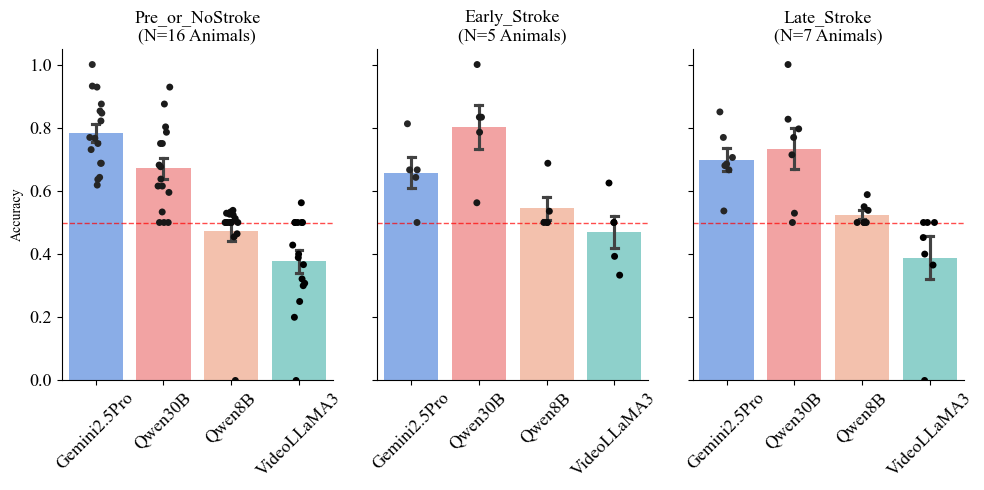

In [16]:
group_order = ["Pre_or_NoStroke", "Early_Stroke", "Late_Stroke"]

fig, axes = plt.subplots(1, len(group_order), figsize=(10, 5), sharey=True)

# Define colors for each model
model_colors = {
    "Gemini2.5Pro": "#4285F4",    # Google blue
    "Qwen30B": "#FF6B6B",         # Red
    "Qwen8B": "#FFA07A",          # Light salmon
    "VideoLLaMA3": "#4ECDC4"      # Teal
}

# Model order
model_order = ["Gemini2.5Pro", "Qwen30B", "Qwen8B", "VideoLLaMA3"]
plt.rcParams['font.family'] = 'Times New Roman'
for i, group in enumerate(group_order):
    ax = axes[i]
    
    # Filter data for this group
    group_data = df_melt[df_melt["group"] == group]
    
    # Bar plot with error bars - FIX: Add hue and legend=False
    sns.barplot(
        data=group_data,
        x="model",
        y="accuracy",
        hue="model",  # Added hue
        order=model_order,
        hue_order=model_order,  # Added hue_order
        errorbar="se",
        capsize=0.1,
        palette=model_colors,
        ax=ax,
        alpha=0.7,
        legend=False  # Added legend=False
    )
    
    # Scatter individual points - FIX: Add hue and legend=False
    sns.stripplot(
        data=group_data,
        x="model",
        y="accuracy",
        hue="model",  # Added hue
        order=model_order,
        hue_order=model_order,  # Added hue_order
        color='black',
        dodge=False,
        jitter=True,
        size=5,
        ax=ax,
        legend=False  # Added legend=False
    )
    
    # Styling
    ax.axhline(y=0.5, color='r', linestyle='--', linewidth=1, alpha=0.7)
    ax.set_ylim(0, 1.05)
    ax.set_ylabel("Accuracy" if i == 0 else "")
    ax.set_xlabel("")
    
    # Add sample size in title
    n_samples = group_data.groupby("filename").ngroups
    ax.set_title(f"{group}\n(N={n_samples} Animals)", fontsize=13)
    
    # FIX: Use tick_params instead of set_xticklabels
    ax.tick_params(axis='x', rotation=45,labelsize=13)
    ax.tick_params(axis='y', labelsize=13)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="center")
    
    # Clean up
    sns.despine(ax=ax)

plt.tight_layout()
plt.savefig('accuracy_comparison_by_group_4models.svg', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import f_oneway, kruskal, mannwhitneyu, wilcoxon, shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

# Assuming df_melt is already created and filtered
# df_melt has columns: ['filename', 'group', 'phase', 'Stroke', 'model', 'accuracy']

print("="*70)
print("STATISTICAL TESTS FOR MODEL COMPARISON")
print("="*70)

# ============================================================================
# TEST 1: Overall comparison - Are models different across all groups?
# ============================================================================
print("\n" + "="*70)
print("TEST 1: Overall Model Comparison (All Groups Combined)")
print("="*70)

# Prepare data for each model
models = df_melt['model'].unique()
model_data = {model: df_melt[df_melt['model'] == model]['accuracy'].dropna() 
              for model in models}

# Check normality for each model
print("\nNormality Tests (Shapiro-Wilk):")
print("-" * 50)
all_normal = True
for model, data in model_data.items():
    if len(data) >= 3:  # Need at least 3 samples
        stat, p = shapiro(data)
        normal = "Normal" if p > 0.05 else "Non-normal"
        all_normal = all_normal and (p > 0.05)
        print(f"{model:20s}: p={p:.4f} ({normal})")
    else:
        print(f"{model:20s}: Not enough samples")

# Choose appropriate test based on normality
if all_normal:
    print("\n→ Data appears normal, using One-Way ANOVA")
    # One-way ANOVA
    f_stat, p_value = f_oneway(*model_data.values())
    print(f"\nOne-Way ANOVA Results:")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print(f"  ✓ Significant difference between models (p < 0.05)")
        
        # Post-hoc: Tukey HSD
        print("\n  Post-hoc: Tukey HSD pairwise comparisons:")
        tukey = pairwise_tukeyhsd(df_melt['accuracy'], df_melt['model'], alpha=0.05)
        print(tukey)
    else:
        print(f"  ✗ No significant difference between models (p ≥ 0.05)")
else:
    print("\n→ Data is non-normal, using Kruskal-Wallis test")
    # Kruskal-Wallis H-test (non-parametric alternative to ANOVA)
    h_stat, p_value = kruskal(*model_data.values())
    print(f"\nKruskal-Wallis Test Results:")
    print(f"  H-statistic: {h_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print(f"  ✓ Significant difference between models (p < 0.05)")
        
        # Post-hoc: Pairwise Mann-Whitney U tests with Bonferroni correction
        print("\n  Post-hoc: Pairwise Mann-Whitney U tests:")
        model_list = list(models)
        n_comparisons = len(model_list) * (len(model_list) - 1) / 2
        alpha_corrected = 0.05 / n_comparisons
        print(f"  (Bonferroni corrected α = {alpha_corrected:.4f})")
        
        for i in range(len(model_list)):
            for j in range(i+1, len(model_list)):
                m1, m2 = model_list[i], model_list[j]
                data1 = model_data[m1]
                data2 = model_data[m2]
                
                if len(data1) > 0 and len(data2) > 0:
                    u_stat, p = mannwhitneyu(data1, data2, alternative='two-sided')
                    sig = "***" if p < alpha_corrected else ""
                    print(f"    {m1:15s} vs {m2:15s}: U={u_stat:6.1f}, p={p:.4f} {sig}")
    else:
        print(f"  ✗ No significant difference between models (p ≥ 0.05)")


# ============================================================================
# TEST 2: Within-group comparisons - Are models different within each group?
# ============================================================================
print("\n" + "="*70)
print("TEST 2: Model Comparison Within Each Group")
print("="*70)

group_order = ["Pre_or_NoStroke", "Early_Stroke", "Late_Stroke"]

for group in group_order:
    print(f"\n{group}:")
    print("-" * 50)
    
    group_data = df_melt[df_melt['group'] == group]
    
    # Prepare data for each model in this group
    group_model_data = {model: group_data[group_data['model'] == model]['accuracy'].dropna() 
                        for model in models}
    
    # Filter out models with no data
    group_model_data = {k: v for k, v in group_model_data.items() if len(v) > 0}
    
    if len(group_model_data) < 2:
        print("  Not enough models with data for comparison")
        continue
    
    # Summary statistics
    print("\n  Summary statistics:")
    for model, data in group_model_data.items():
        print(f"    {model:20s}: mean={data.mean():.3f}, std={data.std():.3f}, n={len(data)}")
    
    # Kruskal-Wallis test (safer for potentially small samples)
    h_stat, p_value = kruskal(*group_model_data.values())
    print(f"\n  Kruskal-Wallis test:")
    print(f"    H-statistic: {h_stat:.4f}")
    print(f"    p-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print(f"    ✓ Significant difference between models in {group}")
    else:
        print(f"    ✗ No significant difference between models in {group}")


# ============================================================================
# TEST 3: Two-way ANOVA - Model × Group interaction
# ============================================================================
print("\n" + "="*70)
print("TEST 3: Two-Way ANOVA (Model × Group)")
print("="*70)

# Filter to only include complete cases
df_anova = df_melt[df_melt['group'].isin(group_order)].dropna(subset=['accuracy'])

try:
    # Fit two-way ANOVA
    model = ols('accuracy ~ C(model) + C(group) + C(model):C(group)', data=df_anova).fit()
    anova_table = anova_lm(model, typ=2)
    
    print("\nTwo-Way ANOVA Results:")
    print(anova_table)
    
    print("\nInterpretation:")
    
    # Main effect of model
    p_model = anova_table.loc['C(model)', 'PR(>F)']
    if p_model < 0.05:
        print(f"  ✓ Main effect of MODEL: p={p_model:.4f} (models differ overall)")
    else:
        print(f"  ✗ Main effect of MODEL: p={p_model:.4f} (models don't differ)")
    
    # Main effect of group
    p_group = anova_table.loc['C(group)', 'PR(>F)']
    if p_group < 0.05:
        print(f"  ✓ Main effect of GROUP: p={p_group:.4f} (groups differ overall)")
    else:
        print(f"  ✗ Main effect of GROUP: p={p_group:.4f} (groups don't differ)")
    
    # Interaction effect
    p_interaction = anova_table.loc['C(model):C(group)', 'PR(>F)']
    if p_interaction < 0.05:
        print(f"  ✓ INTERACTION: p={p_interaction:.4f} (model performance differs by group)")
    else:
        print(f"  ✗ INTERACTION: p={p_interaction:.4f} (model performance consistent across groups)")
        
except Exception as e:
    print(f"Could not perform two-way ANOVA: {e}")


# ============================================================================
# TEST 4: Pairwise comparisons - Best vs others
# ============================================================================
print("\n" + "="*70)
print("TEST 4: Pairwise Comparisons (Best Model vs Others)")
print("="*70)

# Find best model overall
model_means = df_melt.groupby('model')['accuracy'].mean().sort_values(ascending=False)
print("\nOverall model rankings (by mean accuracy):")
for i, (model, mean_acc) in enumerate(model_means.items(), 1):
    print(f"  {i}. {model:20s}: {mean_acc:.4f}")

best_model = model_means.index[0]
print(f"\n→ Comparing {best_model} against all others:")

best_data = df_melt[df_melt['model'] == best_model]['accuracy'].dropna()

for model in model_means.index[1:]:
    other_data = df_melt[df_melt['model'] == model]['accuracy'].dropna()
    
    if len(best_data) > 0 and len(other_data) > 0:
        # Mann-Whitney U test
        u_stat, p = mannwhitneyu(best_data, other_data, alternative='two-sided')
        
        mean_diff = best_data.mean() - other_data.mean()
        sig = "***" if p < 0.05 else ""
        
        print(f"  {best_model} vs {model:15s}: Δ={mean_diff:+.4f}, p={p:.4f} {sig}")


# ============================================================================
# TEST 5: Effect sizes (Cohen's d)
# ============================================================================
print("\n" + "="*70)
print("TEST 5: Effect Sizes (Cohen's d)")
print("="*70)

def cohens_d(x, y):
    """Calculate Cohen's d for two samples"""
    nx, ny = len(x), len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2) / dof)

print(f"\n{best_model} vs others (Cohen's d):")
print("  (Small: 0.2, Medium: 0.5, Large: 0.8)")

for model in model_means.index[1:]:
    other_data = df_melt[df_melt['model'] == model]['accuracy'].dropna()
    
    if len(best_data) > 1 and len(other_data) > 1:
        d = cohens_d(best_data.values, other_data.values)
        
        if abs(d) < 0.2:
            size = "negligible"
        elif abs(d) < 0.5:
            size = "small"
        elif abs(d) < 0.8:
            size = "medium"
        else:
            size = "large"
        
        print(f"  {model:20s}: d={d:+.3f} ({size})")


# ============================================================================
# SUMMARY
# ============================================================================
print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print("\nKey Findings:")
print("1. Check overall model comparison (Test 1) for general differences")
print("2. Check within-group comparisons (Test 2) for group-specific effects")
print("3. Check interaction term (Test 3) to see if model rankings change by group")
print("4. Check pairwise comparisons (Test 4) for specific model differences")
print("5. Check effect sizes (Test 5) for practical significance")
print("\n" + "="*70)

STATISTICAL TESTS FOR MODEL COMPARISON

TEST 1: Overall Model Comparison (All Groups Combined)

Normality Tests (Shapiro-Wilk):
--------------------------------------------------
Gemini2.5Pro        : p=0.7340 (Normal)
Qwen30B             : p=0.1507 (Normal)
Qwen8B              : p=0.0000 (Non-normal)
VideoLLaMA3         : p=0.0009 (Non-normal)

→ Data is non-normal, using Kruskal-Wallis test

Kruskal-Wallis Test Results:
  H-statistic: 74.1545
  p-value: 0.0000
  ✓ Significant difference between models (p < 0.05)

  Post-hoc: Pairwise Mann-Whitney U tests:
  (Bonferroni corrected α = 0.0083)
    Gemini2.5Pro    vs Qwen30B        : U= 466.5, p=0.3379 
    Gemini2.5Pro    vs Qwen8B         : U= 776.0, p=0.0000 ***
    Gemini2.5Pro    vs VideoLLaMA3    : U= 801.5, p=0.0000 ***
    Qwen30B         vs Qwen8B         : U= 736.5, p=0.0000 ***
    Qwen30B         vs VideoLLaMA3    : U= 802.0, p=0.0000 ***
    Qwen8B          vs VideoLLaMA3    : U= 662.5, p=0.0001 ***

TEST 2: Model Comparison

RECALL COMPARISON: ALL MODELS - Success vs Failure Detection

Total observations: 224
Models: ['Gemini2.5Pro' 'Qwen30B' 'Qwen8B' 'VideoLLaMA3']
Classes: ['Success' 'Failure']
Groups: ['Pre_or_NoStroke' 'Early_Stroke' 'Late_Stroke']

Creating visualization...
Visualization saved: recall_all_models_comparison.svg/png

STATISTICAL TESTS BY GROUP

Pre_or_NoStroke

Success Recall:
--------------------------------------------------------------------------------

Summary Statistics:
  Gemini2.5Pro        : mean=0.935, sem=0.021, n=16
  Qwen30B             : mean=0.685, sem=0.060, n=16
  Qwen8B              : mean=0.025, sem=0.010, n=16
  VideoLLaMA3         : mean=0.090, sem=0.029, n=16

Kruskal-Wallis Test:
  H-statistic: 51.0365
  p-value: 0.0000
  ✓ Significant difference between models (p < 0.05)

  Post-hoc pairwise comparisons (Mann-Whitney U):
    (Bonferroni corrected α = 0.0083)
    Gemini2.5Pro    vs Qwen30B        : Δ=+0.250, p=0.0249 ***
    Gemini2.5Pro    vs Qwen8B         : Δ=+

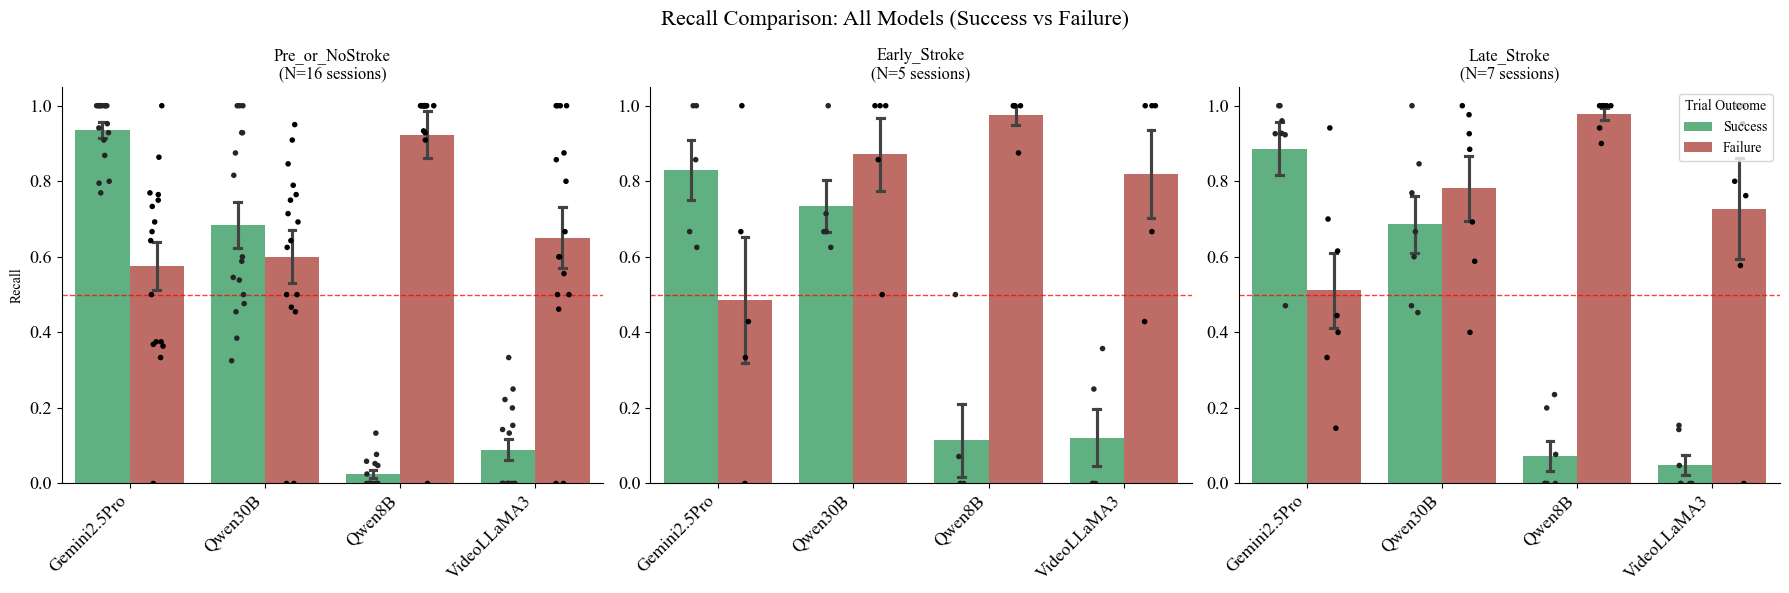

In [17]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, f_oneway, kruskal
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================================
# SETUP: Create groups and melt for RECALL metrics
# ============================================================================

df_merged["group"] = "Other"
df_merged.loc[(df_merged["phase"] == "Pre_Stroke") | (df_merged["Stroke"] == "n"), "group"] = "Pre_or_NoStroke"
df_merged.loc[(df_merged["phase"] == "early") & (df_merged["Stroke"] == "y"), "group"] = "Early_Stroke"
df_merged.loc[(df_merged["phase"] == "Late") & (df_merged["Stroke"] == "y"), "group"] = "Late_Stroke"

# Melt for BOTH recall_s and recall_f for ALL 4 models
df_melt_recall = df_merged.melt(
    id_vars=["filename", "group", "phase", "Stroke"],
    value_vars=[
        "recall_s_Gemini2.5Pro", "recall_f_Gemini2.5Pro",
        "recall_s_Qwen30B", "recall_f_Qwen30B",
        "recall_s_Qwen8B", "recall_f_Qwen8B",
        "recall_s_VideoLLaMA3", "recall_f_VideoLLaMA3"
    ],
    var_name="metric",
    value_name="recall"
)

# Extract model and class from metric name
df_melt_recall["class"] = df_melt_recall["metric"].str.split("_").str[1]  # s or f
df_melt_recall["model"] = df_melt_recall["metric"].str.split("_").str[2]  # Model name

# Map class labels
class_map = {"s": "Success", "f": "Failure"}
df_melt_recall["class_label"] = df_melt_recall["class"].map(class_map)

# Filter to only include the three groups
group_order = ["Pre_or_NoStroke", "Early_Stroke", "Late_Stroke"]
df_melt_recall = df_melt_recall[df_melt_recall["group"].isin(group_order)]

# Drop NaN values
df_melt_recall = df_melt_recall.dropna(subset=["recall"])

print("="*80)
print("RECALL COMPARISON: ALL MODELS - Success vs Failure Detection")
print("="*80)
print(f"\nTotal observations: {len(df_melt_recall)}")
print(f"Models: {df_melt_recall['model'].unique()}")
print(f"Classes: {df_melt_recall['class_label'].unique()}")
print(f"Groups: {df_melt_recall['group'].unique()}")


# ============================================================================
# VISUALIZATION: All models, both classes, three groups
# ============================================================================
print("\n" + "="*80)
print("Creating visualization...")
print("="*80)
plt.rcParams['font.family'] = 'Times New Roman'

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Recall Comparison: All Models (Success vs Failure)', 
             fontsize=16)

# Model order
model_order = ["Gemini2.5Pro", "Qwen30B", "Qwen8B", "VideoLLaMA3"]

# Color palette for classes
class_colors = {
    "Success": "#27ae60",  # Deeper green
    "Failure": "#c0392b"   # Deeper red
}

for i, group in enumerate(group_order):
    ax = axes[i]
    
    # Filter data for this group
    group_data = df_melt_recall[df_melt_recall["group"] == group]
    
    # Bar plot with class as hue
    sns.barplot(
        data=group_data,
        x="model",
        y="recall",
        hue="class_label",
        order=model_order,
        hue_order=["Success", "Failure"],
        errorbar="se",
        capsize=0.1,
        palette=class_colors,
        ax=ax,
        alpha=0.8
    )
    
    # Scatter individual points
    sns.stripplot(
        data=group_data,
        x="model",
        y="recall",
        hue="class_label",
        order=model_order,
        hue_order=["Success", "Failure"],
        dodge=True,
        jitter=True,
        size=4,
        color='black',#palette=class_colors,
        ax=ax,
        legend=False
    )
    
    # Styling
    ax.axhline(y=0.5, color='red', linestyle='--', linewidth=1, alpha=0.75)
    ax.set_ylim(0, 1.05)
    ax.set_ylabel("Recall" if i == 0 else "")
    ax.set_xlabel("")
    
    # Add sample size in title
    n_sessions = group_data.groupby("filename").ngroups
    ax.set_title(f"{group}\n(N={n_sessions} sessions)", fontsize=12)

    # Rotate x labels
    ax.tick_params(axis='x', rotation=45,labelsize=13)
    ax.tick_params(axis='y', labelsize=13)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right")
    
    # Legend only on last subplot
    if i == len(group_order) - 1:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[:2], labels[:2], title="Trial Outcome", loc='upper right')
    else:
        if ax.get_legend():
            ax.get_legend().remove()
    
    sns.despine(ax=ax)

plt.tight_layout()
plt.savefig('recall_all_models_comparison.svg', dpi=300, bbox_inches='tight')
plt.savefig('recall_all_models_comparison.png', dpi=300, bbox_inches='tight')

print("Visualization saved: recall_all_models_comparison.svg/png")


# ============================================================================
# STATISTICAL ANALYSIS: Within each group
# ============================================================================
print("\n" + "="*80)
print("STATISTICAL TESTS BY GROUP")
print("="*80)

for group in group_order:
    print(f"\n{'='*80}")
    print(f"{group}")
    print('='*80)
    
    group_data = df_melt_recall[df_melt_recall["group"] == group]
    
    # Separate by class
    for class_label in ["Success", "Failure"]:
        print(f"\n{class_label} Recall:")
        print("-" * 80)
        
        class_data = group_data[group_data["class_label"] == class_label]
        
        # Summary statistics by model
        print("\nSummary Statistics:")
        for model in model_order:
            model_data = class_data[class_data["model"] == model]["recall"]
            if len(model_data) > 0:
                print(f"  {model:20s}: mean={model_data.mean():.3f}, "
                      f"sem={model_data.sem():.3f}, n={len(model_data)}")
        
        # ANOVA/Kruskal-Wallis test
        model_groups = [class_data[class_data["model"] == m]["recall"].dropna().values 
                       for m in model_order]
        model_groups = [g for g in model_groups if len(g) > 0]  # Remove empty groups
        
        if len(model_groups) >= 2:
            # Use Kruskal-Wallis (non-parametric)
            h_stat, p_value = kruskal(*model_groups)
            
            print(f"\nKruskal-Wallis Test:")
            print(f"  H-statistic: {h_stat:.4f}")
            print(f"  p-value: {p_value:.4f}")
            
            if p_value < 0.05:
                print(f"  ✓ Significant difference between models (p < 0.05)")
                
                # Post-hoc: Pairwise comparisons
                print("\n  Post-hoc pairwise comparisons (Mann-Whitney U):")
                
                # Get all pairwise p-values for correction
                pairwise_ps = []
                comparisons = []
                
                for i in range(len(model_order)):
                    for j in range(i+1, len(model_order)):
                        m1, m2 = model_order[i], model_order[j]
                        data1 = class_data[class_data["model"] == m1]["recall"].dropna()
                        data2 = class_data[class_data["model"] == m2]["recall"].dropna()
                        
                        if len(data1) >= 3 and len(data2) >= 3:
                            from scipy.stats import mannwhitneyu
                            u_stat, p = mannwhitneyu(data1, data2, alternative='two-sided')
                            pairwise_ps.append(p)
                            comparisons.append((m1, m2, u_stat, data1.mean() - data2.mean()))
                
                # Apply Bonferroni correction
                if pairwise_ps:
                    reject, p_corrected, _, _ = multipletests(pairwise_ps, alpha=0.05, method='bonferroni')
                    
                    print(f"    (Bonferroni corrected α = {0.05/len(pairwise_ps):.4f})")
                    
                    for idx, (m1, m2, u_stat, diff) in enumerate(comparisons):
                        sig = "***" if reject[idx] else ""
                        print(f"    {m1:15s} vs {m2:15s}: "
                              f"Δ={diff:+.3f}, p={p_corrected[idx]:.4f} {sig}")
            else:
                print(f"  ✗ No significant difference between models (p ≥ 0.05)")


# ============================================================================
# STATISTICAL ANALYSIS: Model × Class interaction within each group
# ============================================================================
print("\n" + "="*80)
print("TWO-WAY TESTS: Model × Class Interaction")
print("="*80)

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

for group in group_order:
    print(f"\n{group}:")
    print("-" * 80)
    
    group_data = df_melt_recall[df_melt_recall["group"] == group].copy()
    
    try:
        # Two-way ANOVA
        model_anova = ols('recall ~ C(model) + C(class_label) + C(model):C(class_label)', 
                         data=group_data).fit()
        anova_table = anova_lm(model_anova, typ=2)
        
        print("\nTwo-Way ANOVA:")
        print(anova_table)
        
        print("\nInterpretation:")
        
        # Main effect of model
        p_model = anova_table.loc['C(model)', 'PR(>F)']
        if p_model < 0.05:
            print(f"  ✓ Main effect of MODEL: p={p_model:.4f} (models differ)")
        else:
            print(f"  ✗ Main effect of MODEL: p={p_model:.4f} (models similar)")
        
        # Main effect of class
        p_class = anova_table.loc['C(class_label)', 'PR(>F)']
        if p_class < 0.05:
            print(f"  ✓ Main effect of CLASS: p={p_class:.4f} (success ≠ failure recall)")
        else:
            print(f"  ✗ Main effect of CLASS: p={p_class:.4f} (success ≈ failure recall)")
        
        # Interaction
        p_interaction = anova_table.loc['C(model):C(class_label)', 'PR(>F)']
        if p_interaction < 0.05:
            print(f"  ✓ INTERACTION: p={p_interaction:.4f} (model rankings differ for s vs f)")
        else:
            print(f"  ✗ INTERACTION: p={p_interaction:.4f} (model rankings consistent)")
            
    except Exception as e:
        print(f"Could not perform two-way ANOVA: {e}")


# ============================================================================
# SUMMARY TABLE
# ============================================================================
print("\n" + "="*80)
print("SUMMARY: Mean Recall by Model, Class, and Group")
print("="*80)

summary = df_melt_recall.groupby(['group', 'model', 'class_label'])['recall'].agg(['mean', 'sem', 'count']).reset_index()
summary['mean'] = summary['mean'].round(3)
summary['sem'] = summary['sem'].round(3)

# Pivot for easier reading
for class_label in ["Success", "Failure"]:
    print(f"\n{class_label} Recall:")
    print("-" * 80)
    
    class_summary = summary[summary['class_label'] == class_label].pivot(
        index='model', columns='group', values='mean'
    )
    print(class_summary.to_string())


print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)


F1 SCORE COMPARISON: ALL MODELS - Success vs Failure Detection

Total observations: 224
Models: ['Gemini2.5Pro' 'Qwen30B' 'Qwen8B' 'VideoLLaMA3']
Classes: ['Success' 'Failure']
Groups: ['Pre_or_NoStroke' 'Early_Stroke' 'Late_Stroke']

Creating visualization...
Visualization saved: f1_score_all_models_comparison.svg/png

STATISTICAL TESTS BY GROUP

Pre_or_NoStroke

Success F1 Score:
--------------------------------------------------------------------------------

Summary Statistics:
  Gemini2.5Pro        : mean=0.820, sem=0.023, n=16
  Qwen30B             : mean=0.664, sem=0.039, n=16
  Qwen8B              : mean=0.045, sem=0.017, n=16
  VideoLLaMA3         : mean=0.118, sem=0.038, n=16

Kruskal-Wallis Test:
  H-statistic: 50.4700
  p-value: 0.0000
  ✓ Significant difference between models (p < 0.05)

  Post-hoc pairwise comparisons (Mann-Whitney U):
    (Bonferroni corrected α = 0.0083)
    Gemini2.5Pro    vs Qwen30B        : Δ=+0.156, p=0.0693 
    Gemini2.5Pro    vs Qwen8B         : 

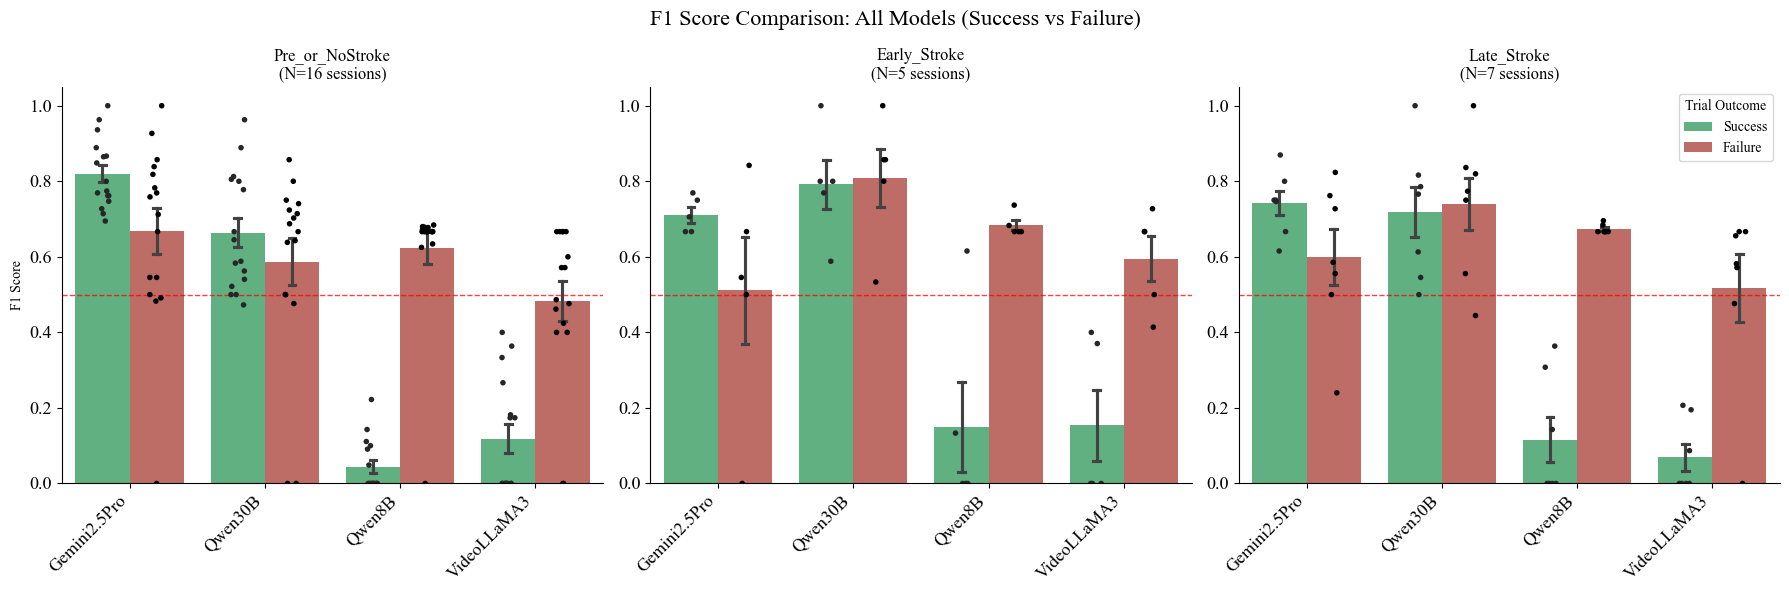

In [14]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, f_oneway, kruskal
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================================
# SETUP: Create groups and melt for F1 metrics
# ============================================================================

df_merged["group"] = "Other"
df_merged.loc[(df_merged["phase"] == "Pre_Stroke") | (df_merged["Stroke"] == "n"), "group"] = "Pre_or_NoStroke"
df_merged.loc[(df_merged["phase"] == "early") & (df_merged["Stroke"] == "y"), "group"] = "Early_Stroke"
df_merged.loc[(df_merged["phase"] == "Late") & (df_merged["Stroke"] == "y"), "group"] = "Late_Stroke"

# Melt for BOTH f1-score_s and f1-score_f for ALL 4 models
df_melt_f1 = df_merged.melt(
    id_vars=["filename", "group", "phase", "Stroke"],
    value_vars=[
        "f1-score_s_Gemini2.5Pro", "f1-score_f_Gemini2.5Pro",
        "f1-score_s_Qwen30B", "f1-score_f_Qwen30B",
        "f1-score_s_Qwen8B", "f1-score_f_Qwen8B",
        "f1-score_s_VideoLLaMA3", "f1-score_f_VideoLLaMA3"
    ],
    var_name="metric",
    value_name="f1_score"
)

# Extract model and class from metric name
df_melt_f1["class"] = df_melt_f1["metric"].str.split("_").str[1]  # s or f
df_melt_f1["model"] = df_melt_f1["metric"].str.split("_").str[2]  # Model name

# Map class labels
class_map = {"s": "Success", "f": "Failure"}
df_melt_f1["class_label"] = df_melt_f1["class"].map(class_map)

# Filter to only include the three groups
group_order = ["Pre_or_NoStroke", "Early_Stroke", "Late_Stroke"]
df_melt_f1 = df_melt_f1[df_melt_f1["group"].isin(group_order)]

# Drop NaN values
df_melt_f1 = df_melt_f1.dropna(subset=["f1_score"])

print("="*80)
print("F1 SCORE COMPARISON: ALL MODELS - Success vs Failure Detection")
print("="*80)
print(f"\nTotal observations: {len(df_melt_f1)}")
print(f"Models: {df_melt_f1['model'].unique()}")
print(f"Classes: {df_melt_f1['class_label'].unique()}")
print(f"Groups: {df_melt_f1['group'].unique()}")


# ============================================================================
# VISUALIZATION: All models, both classes, three groups
# ============================================================================
print("\n" + "="*80)
print("Creating visualization...")
print("="*80)
plt.rcParams['font.family'] = 'Times New Roman'

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('F1 Score Comparison: All Models (Success vs Failure)', 
             fontsize=16)

# Model order
model_order = ["Gemini2.5Pro", "Qwen30B", "Qwen8B", "VideoLLaMA3"]

# Color palette for classes
class_colors = {
    "Success": "#27ae60",  # Deeper green
    "Failure": "#c0392b"   # Deeper red
}

for i, group in enumerate(group_order):
    ax = axes[i]
    
    # Filter data for this group
    group_data = df_melt_f1[df_melt_f1["group"] == group]
    
    # Bar plot with class as hue
    sns.barplot(
        data=group_data,
        x="model",
        y="f1_score",
        hue="class_label",
        order=model_order,
        hue_order=["Success", "Failure"],
        errorbar="se",
        capsize=0.1,
        palette=class_colors,
        ax=ax,
        alpha=0.8
    )
    
    # Scatter individual points
    sns.stripplot(
        data=group_data,
        x="model",
        y="f1_score",
        hue="class_label",
        order=model_order,
        hue_order=["Success", "Failure"],
        dodge=True,
        jitter=True,
        size=4,
        color='black',
        ax=ax,
        legend=False
    )
    
    # Styling
    ax.axhline(y=0.5, color='red', linestyle='--', linewidth=1, alpha=0.75)
    ax.set_ylim(0, 1.05)
    ax.set_ylabel("F1 Score" if i == 0 else "")
    ax.set_xlabel("")
    
    # Add sample size in title
    n_sessions = group_data.groupby("filename").ngroups
    ax.set_title(f"{group}\n(N={n_sessions} sessions)", fontsize=12)

    # Rotate x labels
    ax.tick_params(axis='x', rotation=45, labelsize=13)
    ax.tick_params(axis='y', labelsize=13)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right")
    
    # Legend only on last subplot
    if i == len(group_order) - 1:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[:2], labels[:2], title="Trial Outcome", loc='upper right')
    else:
        if ax.get_legend():
            ax.get_legend().remove()
    
    sns.despine(ax=ax)

plt.tight_layout()
plt.savefig('f1_score_all_models_comparison.svg', dpi=300, bbox_inches='tight')
plt.savefig('f1_score_all_models_comparison.png', dpi=300, bbox_inches='tight')

print("Visualization saved: f1_score_all_models_comparison.svg/png")


# ============================================================================
# STATISTICAL ANALYSIS: Within each group
# ============================================================================
print("\n" + "="*80)
print("STATISTICAL TESTS BY GROUP")
print("="*80)

for group in group_order:
    print(f"\n{'='*80}")
    print(f"{group}")
    print('='*80)
    
    group_data = df_melt_f1[df_melt_f1["group"] == group]
    
    # Separate by class
    for class_label in ["Success", "Failure"]:
        print(f"\n{class_label} F1 Score:")
        print("-" * 80)
        
        class_data = group_data[group_data["class_label"] == class_label]
        
        # Summary statistics by model
        print("\nSummary Statistics:")
        for model in model_order:
            model_data = class_data[class_data["model"] == model]["f1_score"]
            if len(model_data) > 0:
                print(f"  {model:20s}: mean={model_data.mean():.3f}, "
                      f"sem={model_data.sem():.3f}, n={len(model_data)}")
        
        # ANOVA/Kruskal-Wallis test
        model_groups = [class_data[class_data["model"] == m]["f1_score"].dropna().values 
                       for m in model_order]
        model_groups = [g for g in model_groups if len(g) > 0]  # Remove empty groups
        
        if len(model_groups) >= 2:
            # Use Kruskal-Wallis (non-parametric)
            h_stat, p_value = kruskal(*model_groups)
            
            print(f"\nKruskal-Wallis Test:")
            print(f"  H-statistic: {h_stat:.4f}")
            print(f"  p-value: {p_value:.4f}")
            
            if p_value < 0.05:
                print(f"  ✓ Significant difference between models (p < 0.05)")
                
                # Post-hoc: Pairwise comparisons
                print("\n  Post-hoc pairwise comparisons (Mann-Whitney U):")
                
                # Get all pairwise p-values for correction
                pairwise_ps = []
                comparisons = []
                
                for i in range(len(model_order)):
                    for j in range(i+1, len(model_order)):
                        m1, m2 = model_order[i], model_order[j]
                        data1 = class_data[class_data["model"] == m1]["f1_score"].dropna()
                        data2 = class_data[class_data["model"] == m2]["f1_score"].dropna()
                        
                        if len(data1) >= 3 and len(data2) >= 3:
                            from scipy.stats import mannwhitneyu
                            u_stat, p = mannwhitneyu(data1, data2, alternative='two-sided')
                            pairwise_ps.append(p)
                            comparisons.append((m1, m2, u_stat, data1.mean() - data2.mean()))
                
                # Apply Bonferroni correction
                if pairwise_ps:
                    reject, p_corrected, _, _ = multipletests(pairwise_ps, alpha=0.05, method='bonferroni')
                    
                    print(f"    (Bonferroni corrected α = {0.05/len(pairwise_ps):.4f})")
                    
                    for idx, (m1, m2, u_stat, diff) in enumerate(comparisons):
                        sig = "***" if reject[idx] else ""
                        print(f"    {m1:15s} vs {m2:15s}: "
                              f"Δ={diff:+.3f}, p={p_corrected[idx]:.4f} {sig}")
            else:
                print(f"  ✗ No significant difference between models (p ≥ 0.05)")


# ============================================================================
# STATISTICAL ANALYSIS: Model × Class interaction within each group
# ============================================================================
print("\n" + "="*80)
print("TWO-WAY TESTS: Model × Class Interaction")
print("="*80)

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

for group in group_order:
    print(f"\n{group}:")
    print("-" * 80)
    
    group_data = df_melt_f1[df_melt_f1["group"] == group].copy()
    
    try:
        # Two-way ANOVA
        model_anova = ols('f1_score ~ C(model) + C(class_label) + C(model):C(class_label)', 
                         data=group_data).fit()
        anova_table = anova_lm(model_anova, typ=2)
        
        print("\nTwo-Way ANOVA:")
        print(anova_table)
        
        print("\nInterpretation:")
        
        # Main effect of model
        p_model = anova_table.loc['C(model)', 'PR(>F)']
        if p_model < 0.05:
            print(f"  ✓ Main effect of MODEL: p={p_model:.4f} (models differ)")
        else:
            print(f"  ✗ Main effect of MODEL: p={p_model:.4f} (models similar)")
        
        # Main effect of class
        p_class = anova_table.loc['C(class_label)', 'PR(>F)']
        if p_class < 0.05:
            print(f"  ✓ Main effect of CLASS: p={p_class:.4f} (success ≠ failure F1)")
        else:
            print(f"  ✗ Main effect of CLASS: p={p_class:.4f} (success ≈ failure F1)")
        
        # Interaction
        p_interaction = anova_table.loc['C(model):C(class_label)', 'PR(>F)']
        if p_interaction < 0.05:
            print(f"  ✓ INTERACTION: p={p_interaction:.4f} (model rankings differ for s vs f)")
        else:
            print(f"  ✗ INTERACTION: p={p_interaction:.4f} (model rankings consistent)")
            
    except Exception as e:
        print(f"Could not perform two-way ANOVA: {e}")


# ============================================================================
# SUMMARY TABLE
# ============================================================================
print("\n" + "="*80)
print("SUMMARY: Mean F1 Score by Model, Class, and Group")
print("="*80)

summary = df_melt_f1.groupby(['group', 'model', 'class_label'])['f1_score'].agg(['mean', 'sem', 'count']).reset_index()
summary['mean'] = summary['mean'].round(3)
summary['sem'] = summary['sem'].round(3)

# Pivot for easier reading
for class_label in ["Success", "Failure"]:
    print(f"\n{class_label} F1 Score:")
    print("-" * 80)
    
    class_summary = summary[summary['class_label'] == class_label].pivot(
        index='model', columns='group', values='mean'
    )
    print(class_summary.to_string())


print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)
